## Categorising countries

### Data Source

The data used in this task was orginally sourced from Help.NGO. This international non-governmental organisation specialises in emergency response, preparedness, and risk mitigation.  

### Dataset Attributes
- country: name of the country
- child_mort: death of children under 5 years of age per 1000 live births
- exports: exports of goods and services per capita. Given as a percentage of the GDP per capita
- health: total health spending per capita. Given as a percentage of GDP per capita
- imports: imports of goods and services per capita. Given as a percentage of the GDP per capita
- income: net income per person
- inflation: the measurement of the annual growth rate of the Total GDP
- life_expec: the average number of years a new born child would live if the current mortality patterns remain the same
- total_fer: the number of children that would be born to each woman if the current age-fertility rates remains the same
- gdpp: the GDP per capita. Calculated as the Total GDP divided by the total population.

## Objective  
To group countries using socio-economic and health factors to determine the development status of the country.

### Practical Task:

Follow these steps:
*  Open Kmeans_task.ipynb.
*  Load the Country-data.csv dataset.
*  Drop any non-numeric columns from the dataset.
*  Plot nine different scatter plots with different combinations of variables against GDPP. For example, GDPP vs health. 
    *  Note which of these plots looks the most promising for separating into clusters.
*  Normalise the dataset using MinMaxScaler from sklearn.
*  Find the optimal number of clusters using the elbow and silhouette score method.
*  Fit the scaled dataset to the optimal number of clusters. Report back on the silhouette score of the model. 
*  Visualise the clusters for the following two groups:
    *  Child mortality vs GDPP
    *  Inflation vs GDPP
*  Label the groups of countries in the plots you created based on child mortality, GDPP, and inflation. You may use terms such as: least developed, developing, and developed, or low, low-middle, upper-middle, and high income. Alternatively, simply rank them from highest to lowest. Justify the labels you assign to each group.

In [507]:
import numpy as np
import pandas as pd
# Import libraries

import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)
import os
# Import warning module

import matplotlib.pyplot as plt
import seaborn as sns
# Import seaborn and pyplot for plots.

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
# Import relevant sklean tools for Kmeans, scoring and scaling.

%matplotlib inline
# Line of code to save and pan, as using Matplotlib to plot and render

In [508]:
rseed = 42
# Random state seed

## Load and explore data

In [509]:
df = pd.read_csv('Country-data.csv')
# Import the dataset

In [510]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


&nbsp;

In [511]:
df.shape
# Check the shape to show records and number of columns

(167, 10)

In [512]:
df.info()
# Check column datatypes & counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [513]:
df.describe()
# Show descriptive statistics, to get feel for data

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


&nbsp;

In [514]:
df.isnull().sum()
# Identify any missing values in the dataset

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

## Preprocessing and Feature Selection

In [515]:
df.drop(columns=['country'],inplace=True)
# Dropping column 'country' as it's a non-numeric (object) datatype

In [516]:
df.info()
# Check column datatypes & counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   child_mort  167 non-null    float64
 1   exports     167 non-null    float64
 2   health      167 non-null    float64
 3   imports     167 non-null    float64
 4   income      167 non-null    int64  
 5   inflation   167 non-null    float64
 6   life_expec  167 non-null    float64
 7   total_fer   167 non-null    float64
 8   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 11.9 KB


<Axes: >

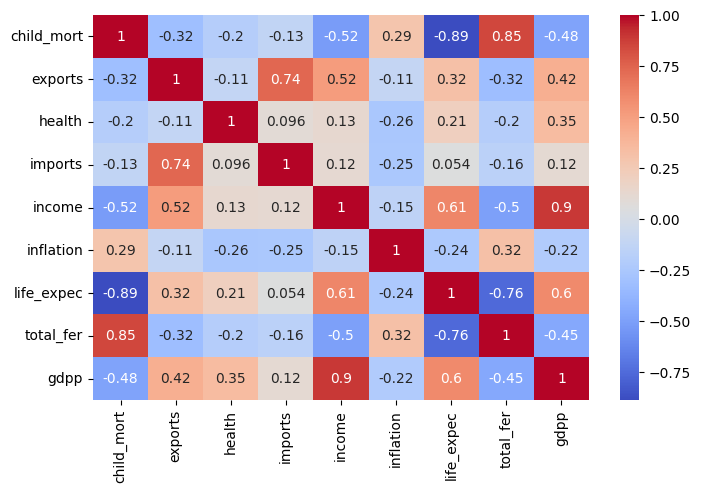

In [517]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(df.corr(),annot =True, cmap='coolwarm')
# Created a correlation map of features to explore relationships between features

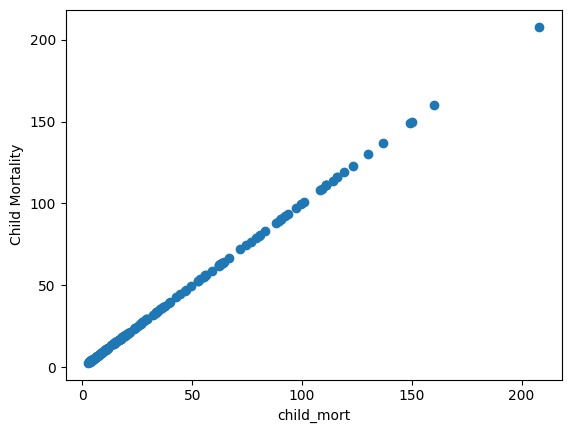

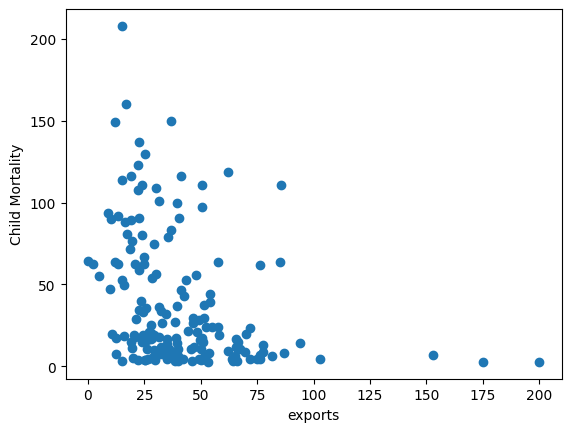

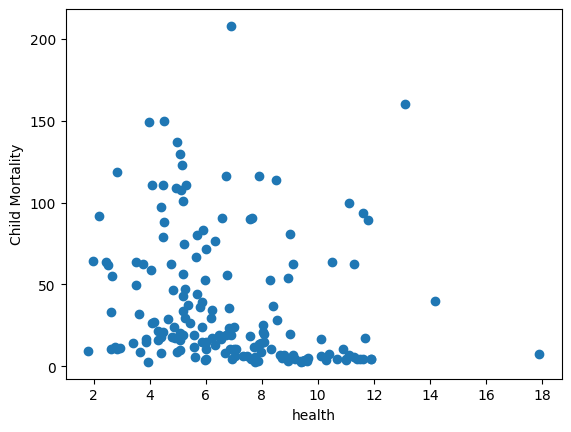

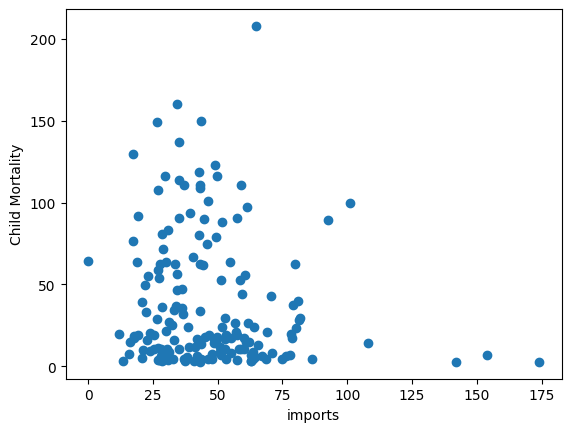

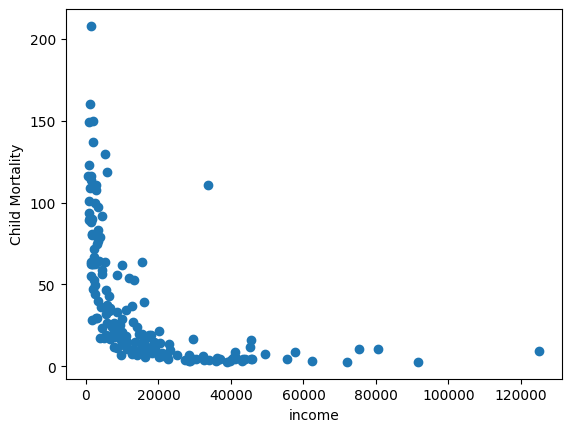

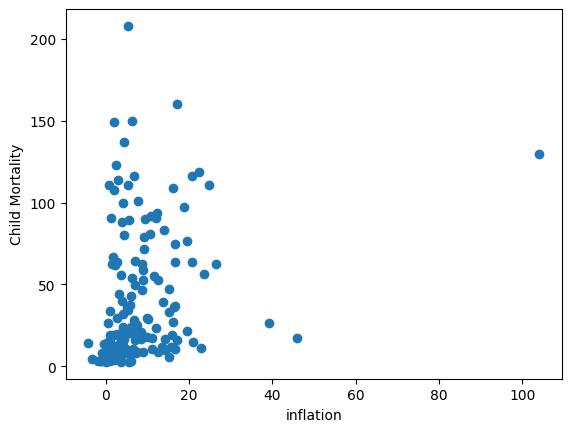

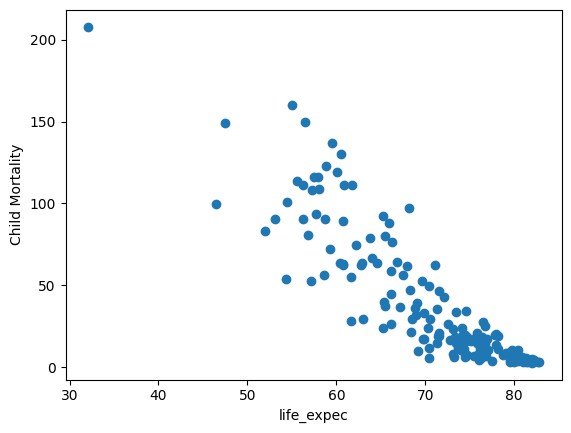

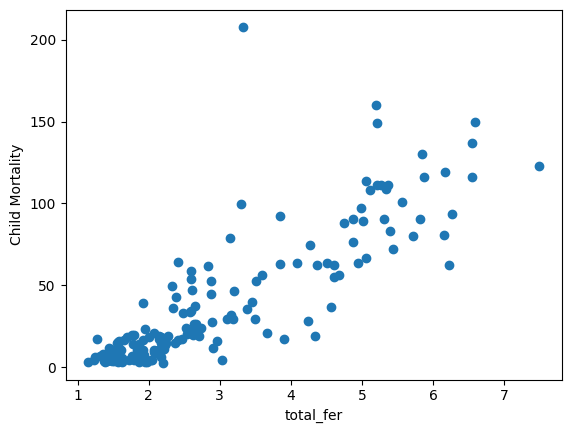

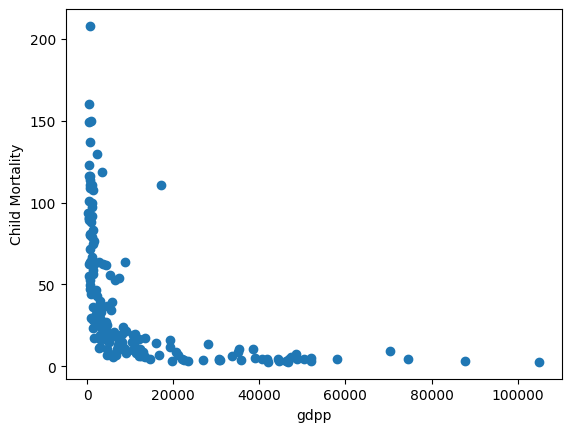

In [518]:
# Explore the continuous independent features against child_mort using scatter plots.

for f in df.columns[0:]:
  plt.scatter(df[f], df['child_mort'])
  plt.xlabel(f)
  plt.ylabel('Child Mortality')
  plt.show()

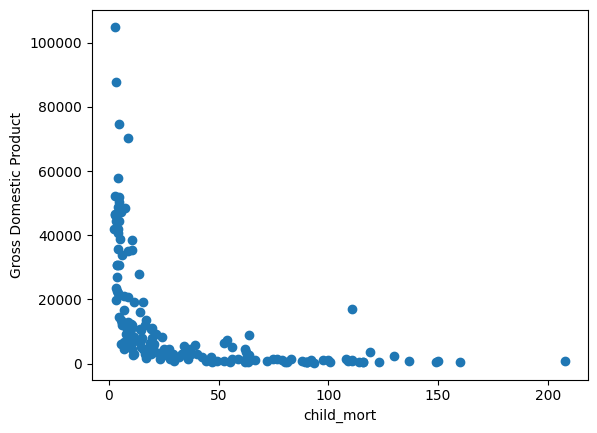

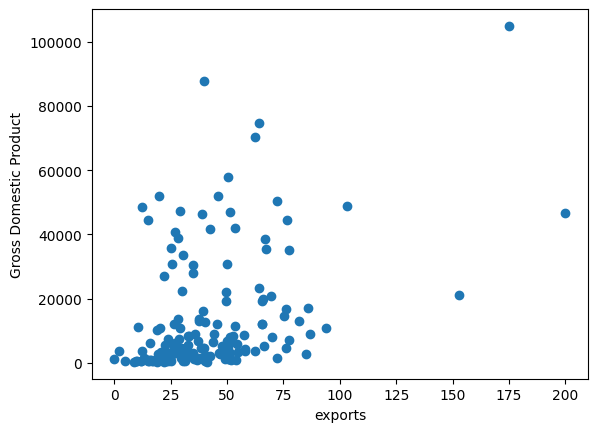

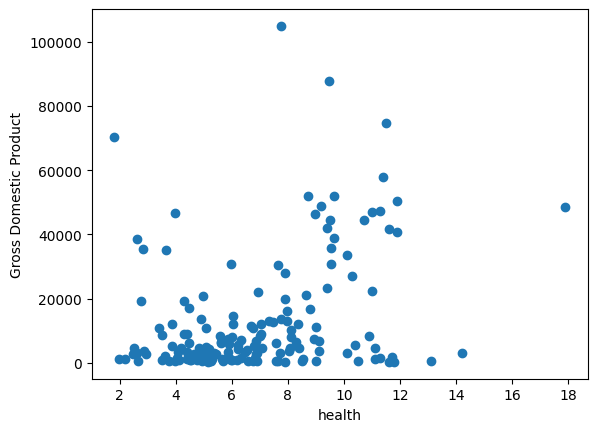

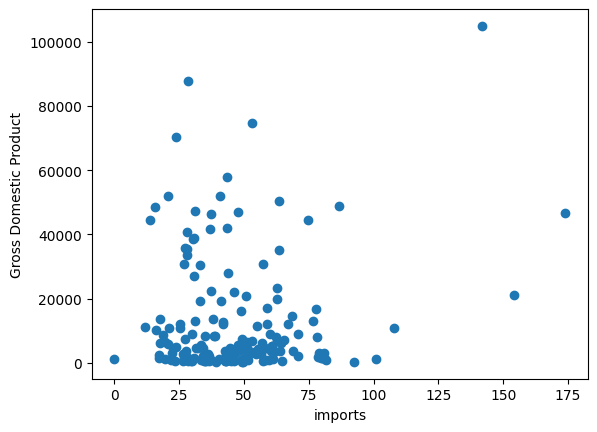

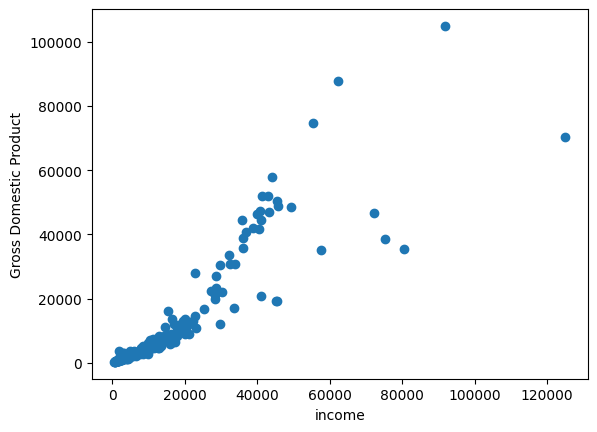

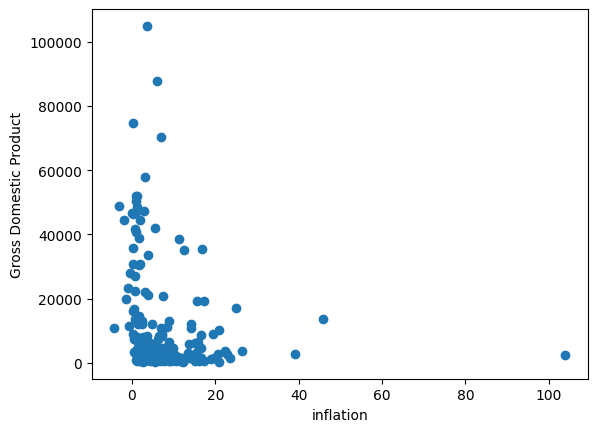

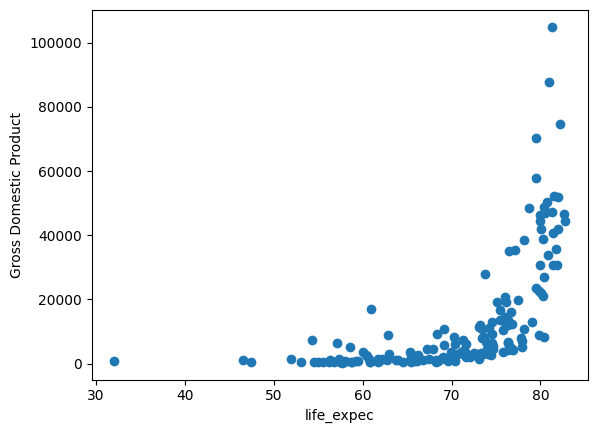

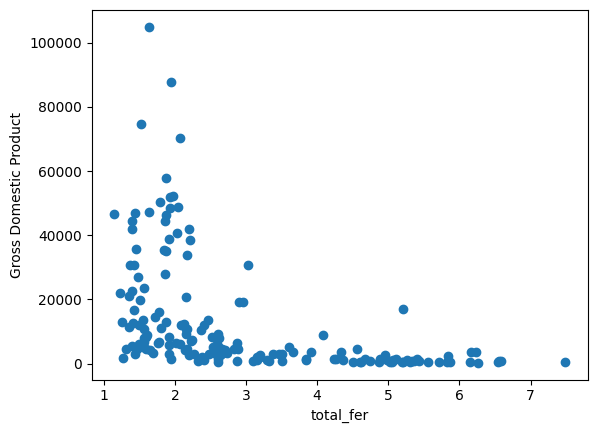

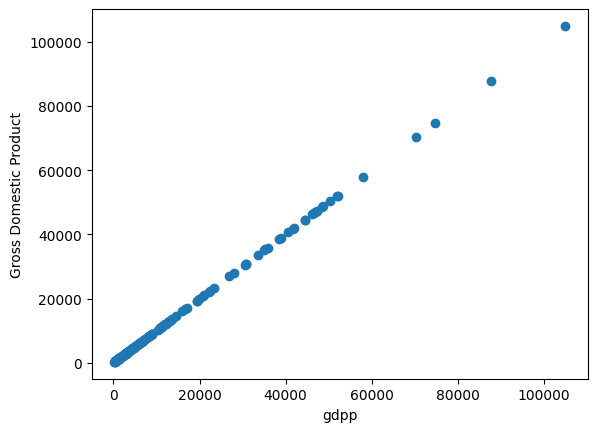

In [519]:
# Explore the continuous independent features against gdpp using scatter plots.

for f in df.columns[0:]:
  plt.scatter(df[f], df['gdpp'])
  plt.xlabel(f)
  plt.ylabel('Gross Domestic Product')
  plt.show()

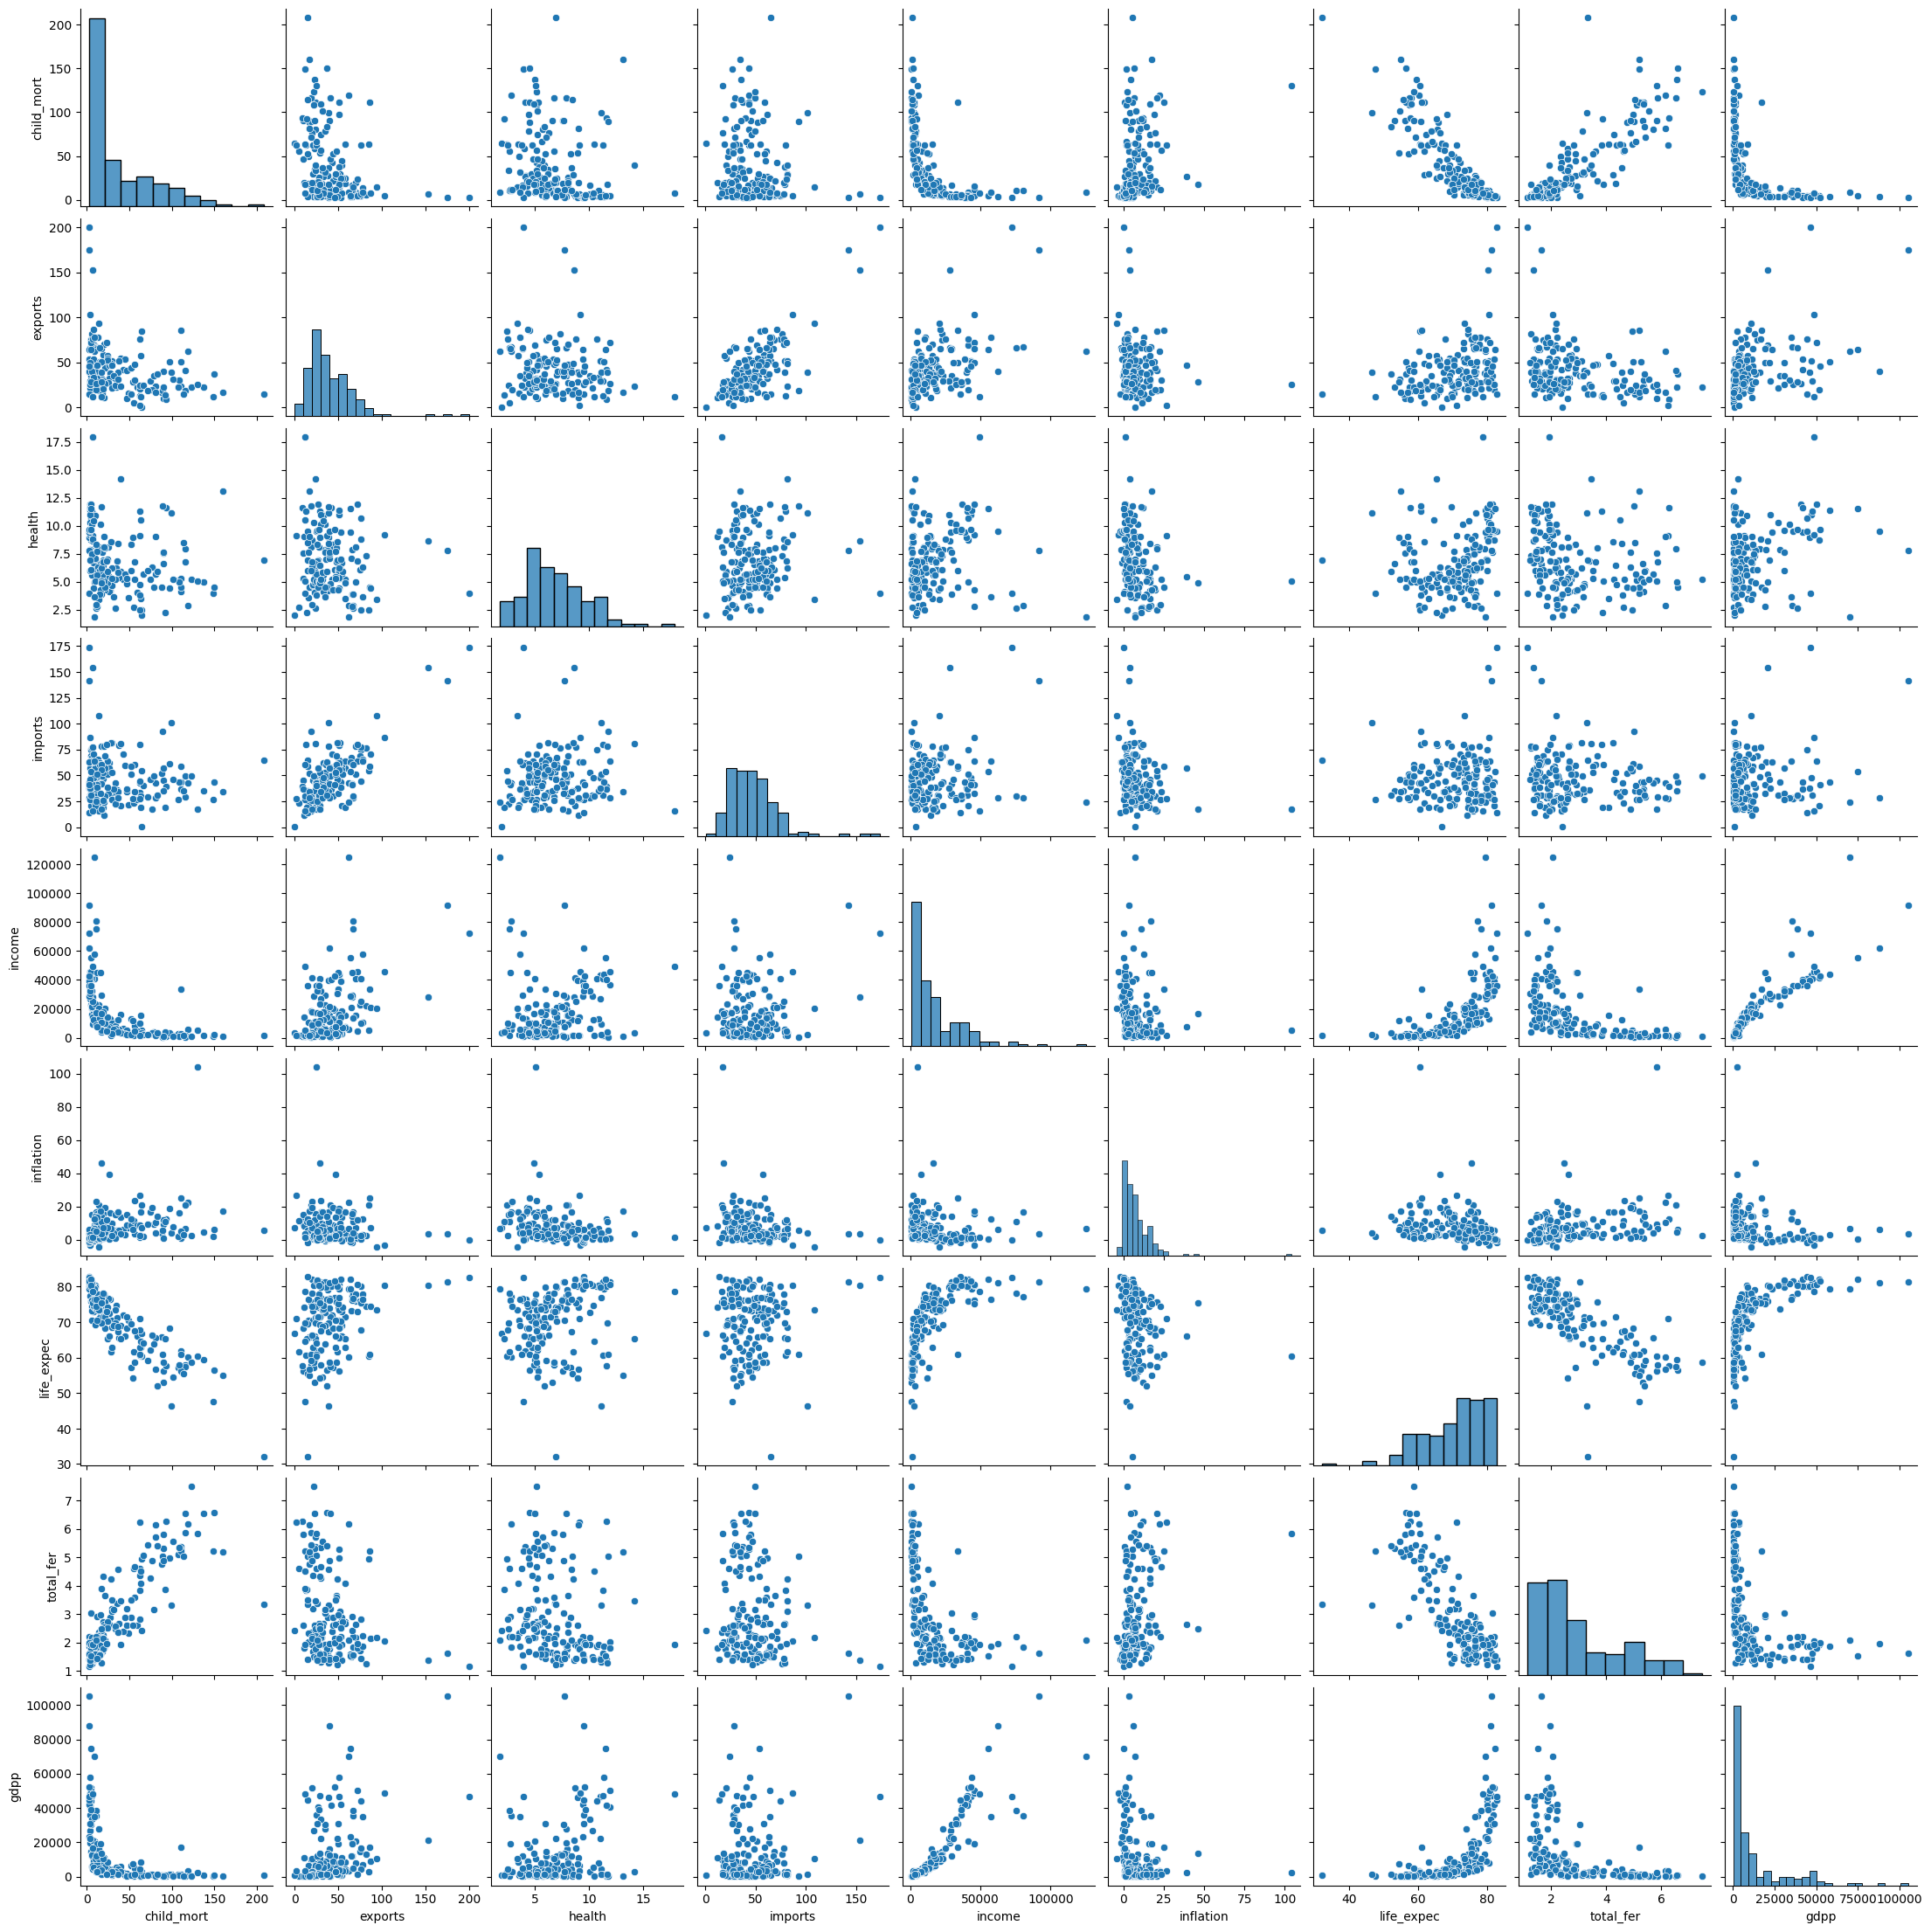

In [520]:
# Create a pair plot
sns.pairplot(df)

Note the peaks in the diagonal graphs that are distinct from each other or only overlap slightly. Looking at the scatter plot distributions may also give you some indication of features that would be good candidates for clustering the data.

In [521]:
df.drop(columns=['health'], inplace=True)
df.drop(columns=['imports'], inplace=True)
# Dropping columns 'health' and 'import' due to poor correlation with the other independent features

### Scaling the Data

In [541]:
scaled = MinMaxScaler()
df_scaled = scaled.fit_transform(df)
# Normalise the data using MinMaxScaler 


In [542]:
print(df_scaled)
# Print scaled data.

[[0.42648491 0.04948197 0.00804721 ... 0.73659306 0.00307343 1.        ]
 [0.06815969 0.13953104 0.07493307 ... 0.07886435 0.03683341 0.        ]
 [0.12025316 0.1915594  0.0988094  ... 0.27444795 0.04036499 0.        ]
 ...
 [0.10077897 0.35965101 0.03120001 ... 0.12618297 0.01029885 0.        ]
 [0.26144109 0.1495365  0.03111961 ... 0.55520505 0.01029885 1.        ]
 [0.39191821 0.18455558 0.02147261 ... 0.670347   0.01173057 1.        ]]


## K-Means Clustering

### Selecting K - performed comparison between Elbow and Silhouette score
* Plot Elbow curve to identify optimal number of clusters using elbow method

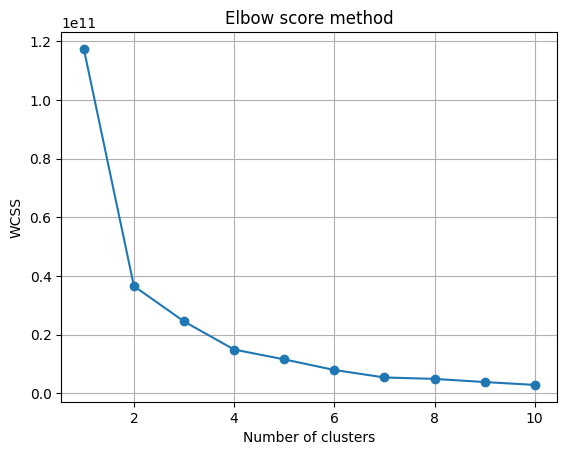

In [543]:
wcss = []
# Create an empty list to store the within-cluster sum of square value

k_range = range(1,11)
# Create range of k values to test

for i in k_range:
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
# Fit the KMeans model for each k value

plt.plot(k_range, wcss, marker='o')
plt.title('Elbow score method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(visible=True)
# Plot the wcss values against k values with sns.


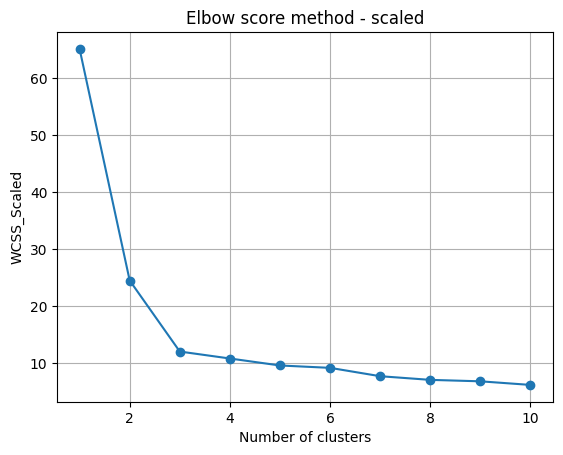

In [544]:
wcss_s = []
# Create an empty list to store the within-cluster sum of square value for scaled data

k_range = range(1,11)
# Create a range of k values to test.

for i in k_range:
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_scaled)
    wcss_s.append(kmeans.inertia_)
# Fit the KMeans model for each k value for scaled dataset.

plt.plot(k_range, wcss_s, marker='o')
plt.title('Elbow score method - scaled')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS_Scaled')
plt.grid(visible=True)
# Plot elbow curve for the wcss against k values for scaled dataset

* Plot Silhouette curve to identify optimal number of clusters using silhouette score

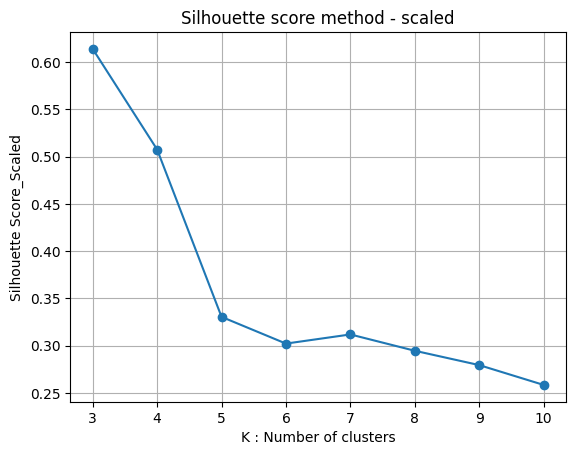

In [545]:
sil = []
# Create an empty list to store the silhouette score

k_values = range(3, 11)
# Create range of values to test

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, max_iter=500)
    kmeans.fit(df_scaled)
    labels = kmeans.labels_
    sil.append(silhouette_score(df_scaled, labels))
# Fit the KMeans model for each k value for scaled dataset.

plt.plot(k_values, sil, marker='o')
plt.title('Silhouette score method - scaled')
plt.xlabel('K : Number of clusters')
plt.ylabel('Silhouette Score_Scaled')
plt.grid(visible=True)
plt.show()
# Plot silhouette curve against k values for scaled dataset

Based on the Elbow and Silhouette score method choose a value for K.

After comparing both method the value is selected as <b> K = 3

## Fitting a K-Means Model with the selected K value

In [546]:
kmeans = KMeans(n_clusters=3, random_state=rseed)
# kmeans = KMeans(n_clusters=2, random_state=rseed)
# Experimented with cluster value of 2, however the silhouette score comes out lower (0.6867511740037066)  in comparison to k=3.

kmeans.fit(df_scaled)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
# Train the Kmeans model with the optimal number of clusters as 3.

In [547]:
df_scaled = pd.DataFrame(df_scaled)
# Converting scaled dataset back to dataframe

In [548]:
df_scaled.head()

,0,1,2,3,4,5,6,7
0,0.426485,0.049482,0.008047,0.126144,0.475345,0.736593,0.003073,1.0
1,0.068160,0.139531,0.074933,0.080399,0.871795,0.078864,0.036833,0.0
2,0.120253,0.191559,0.098809,0.187691,0.875740,0.274448,0.040365,0.0
3,0.566699,0.311125,0.042535,0.245911,0.552268,0.790221,0.031488,1.0
4,0.037488,0.227079,0.148652,0.052213,0.881657,0.154574,0.114242,0.0


In [549]:
df_scaled['cluster'] = labels
# Add the 'cluster' column to the DataFrame

In [550]:
df_scaled ['cluster'].value_counts()
# Count the number of records in each cluster

cluster
0    84
1    46
2    37
Name: count, dtype: int64

In [551]:
silhouette_avg = silhouette_score(df_scaled, labels)
print('KMeans Model Silhouette Score :', silhouette_avg)
# Check model performance with the silhouette coefficient

KMeans Model Silhouette Score : 0.7853946969958646


## Predictions

In [552]:
df['p_cluster'] = kmeans.labels_
# Add the predicted cluster label column to the original dataframe

## Visualisation of clusters

In [553]:
df.columns

Index(['child_mort', 'exports', 'income', 'inflation', 'life_expec',
       'total_fer', 'gdpp', 'p_cluster'],
      dtype='object')

In [554]:
df.head()

,child_mort,exports,income,inflation,life_expec,total_fer,gdpp,p_cluster
0,90.2,10.0,1610,9.44,56.2,5.82,553,1
1,16.6,28.0,9930,4.49,76.3,1.65,4090,0
2,27.3,38.4,12900,16.10,76.5,2.89,4460,0
3,119.0,62.3,5900,22.40,60.1,6.16,3530,1
4,10.3,45.5,19100,1.44,76.8,2.13,12200,0


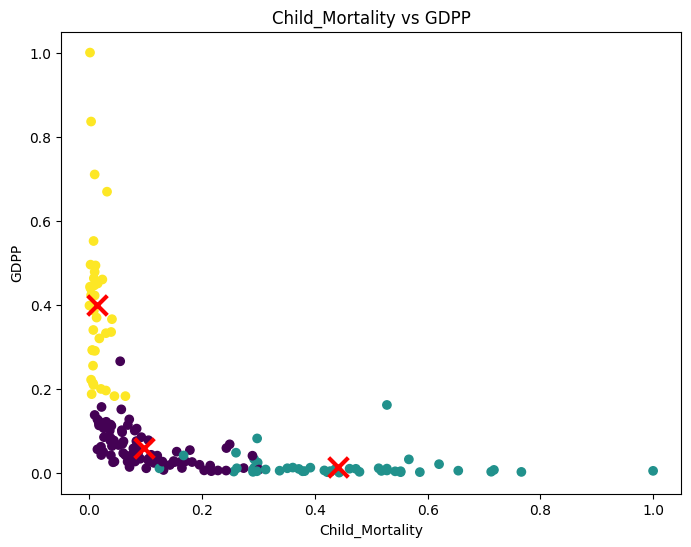

In [555]:
plt.figure(figsize=(8, 6))
plt.scatter(df_scaled[0], df_scaled[6], c=labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 6], marker='x', s=200, linewidths=3, color='red')
plt.title('Child_Mortality vs GDPP')
plt.xlabel('Child_Mortality')
plt.ylabel('GDPP')
plt.show()
# Visualisation of clusters: child mortality vs gdpp

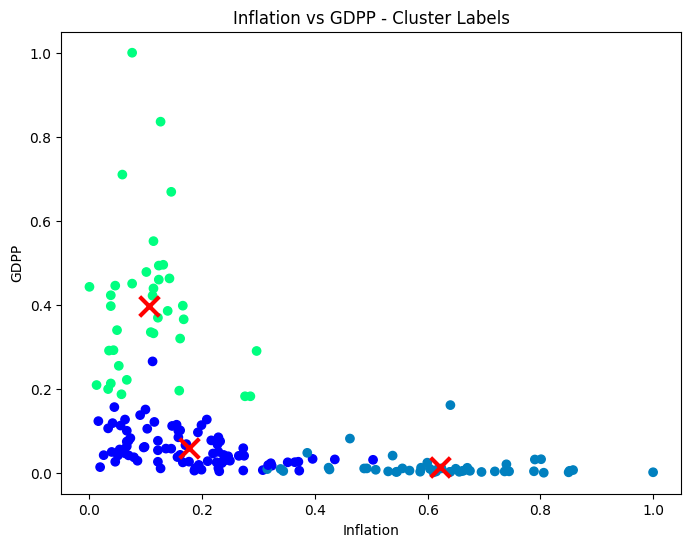

In [556]:
plt.figure(figsize=(8, 6))
plt.scatter(df_scaled[5], df_scaled[6], c=labels, cmap='winter')
plt.scatter(centroids[:, 5], centroids[:, 6], marker='x', s=200, linewidths=3, color='red')
plt.title('Inflation vs GDPP - Cluster Labels')
plt.xlabel('Inflation')
plt.ylabel('GDPP')
plt.show()
# Visualisation of clusters: inflation vs gdpp

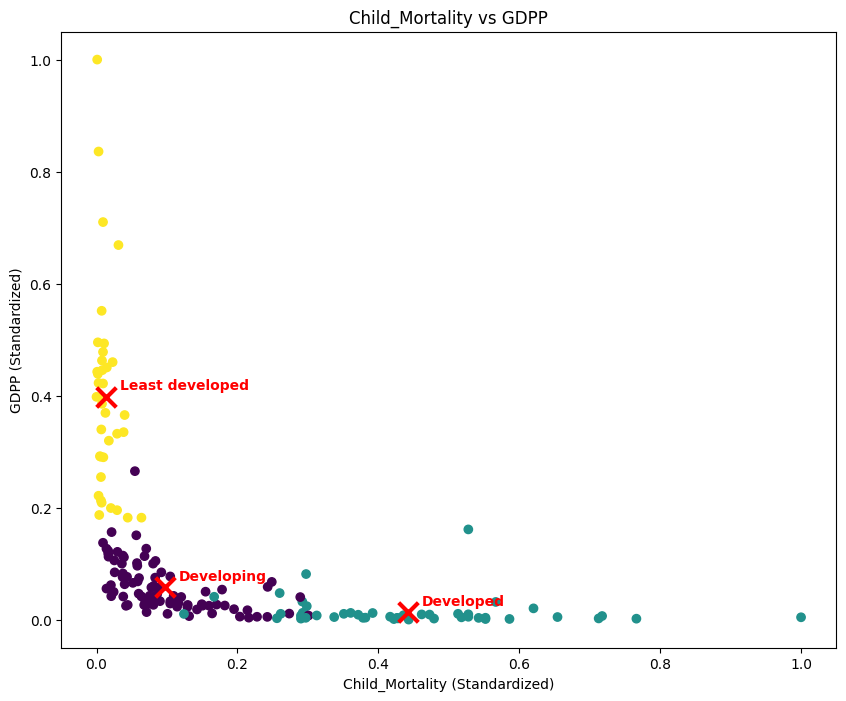

In [557]:
cluster_labels = ['Developing', 'Developed', 'Least developed']
# Assign labels to the clusters based on their characteristics

plt.figure(figsize=(10, 8))
plt.scatter(df_scaled[0], df_scaled[6], c=labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 6], marker='x', s=200, linewidths=3, color='red')

for i, label in enumerate(cluster_labels):
    plt.annotate(label, (centroids[i, 0], centroids[i, 6]),
                 xytext=(10, 5), textcoords='offset points',
                 fontsize=10, color='red', fontweight='bold')
# Annotate the cluster centroids with labels

plt.title('Child_Mortality vs GDPP')
plt.xlabel('Child_Mortality (Standardized)')
plt.ylabel('GDPP (Standardized)')
plt.show()
# Visualisation of clusters: child mortality vs gdpp with cluster labels

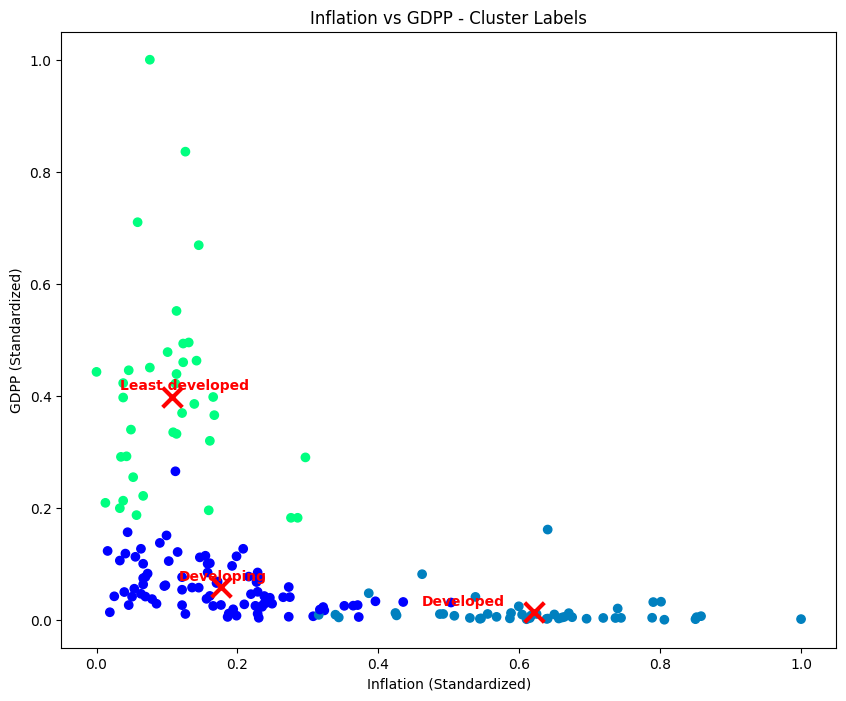

In [558]:
cluster_labels = ['Developing', 'Developed', 'Least developed']
# Assign labels to the clusters based on their characteristics

plt.figure(figsize=(10, 8))
plt.scatter(df_scaled[5], df_scaled[6], c=labels, cmap='winter')
plt.scatter(centroids[:, 5], centroids[:, 6], marker='x', s=200, linewidths=3, color='red')

for i, label in enumerate(cluster_labels):
    plt.annotate(label, (centroids[i, 0], centroids[i, 6]),
                 xytext=(10, 5), textcoords='offset points',
                 fontsize=10, color='red', fontweight='bold')
# Annotate the cluster centroids with labels

plt.title('Inflation vs GDPP - Cluster Labels')
plt.xlabel('Inflation (Standardized)')
plt.ylabel('GDPP (Standardized)')
plt.show()
# Visualisation of clusters: inflation vs gdpp with cluster labels

## Conclusions

Label the groups of countries in the plots you created based on child mortality, GDPP and inflation. You may use [terms](https://en.wikipedia.org/wiki/Developing_country#Terms_used_to_classify_countries) such as: least developed, developing and developed, or low, low-middle, upper-middle and high income. Alternatively, simply rank them from highest to lowest. Justify the labels you assign to each group.


**Child Mortality vs GDPP Analysis:**

|Cluster|Labels              |Country Classification             |
|-------|-------------------|-----------------------------------|
|0      |Least Developed    |Low GDP, High Child Mortality      |
|1      |Developing         |Medium GDP, Medium Child Mortality |
|2      |Developed          |High GDP, Lowest Child Mortality   |

**Inflation vs GDPP Analysis:**

|Cluster|Labels              |Country Classification             |
|-------|-------------------|-----------------------------------|
|0      |Least Developed    |Low GDP, High Inflation      |
|1      |Developing         |Medium GDP, Medium Inflation |
|2      |Developed          |High GDP, Lowest Inflation   |